In [31]:
import openfermion
import warnings
warnings.filterwarnings("ignore")
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap


util_dir = "/home/jwdesroches/python/Ga2QuAMES/symmetry/helper_funcs/"
sys.path.append(util_dir)

from helper_functions import *
from XBK_method import *
from utils import *
from pyscf import gto, scf, fci


In [18]:
mol_name = "H2"
bond_lengths = np.around(np.arange(0.3,3.0,0.05),2)
charge = 0
spin = 0
basis_set = "sto-3g"

unsimp_energies = []
simp_energies = []

for bond_length in bond_lengths:
    geometry = return_geometry(mol_name, bond_length)
    
    unsimp_hamiltonian = get_unsimplified_hamiltonian(atom = geometry, basis = basis_set, charge = charge, spin = spin)
    simp_hamiltonian = get_simplified_hamiltonian(atom = geometry, basis = basis_set, charge = charge, spin = spin)
    
    unsimp_energy, _ = openfermion.linalg.get_ground_state(openfermion.linalg.get_sparse_operator(unsimp_hamiltonian))
    simp_energy, _ = np.linalg.eigh(openfermion.linalg.get_sparse_operator(simp_hamiltonian).todense())
    
    simp_energy = simp_energy[0]
    
    unsimp_energies += [unsimp_energy]
    simp_energies += [simp_energy]    

In [32]:
fci_bond_lengths = np.linspace(0.3, 3.0, 100)
fci_energies = []
for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(atom=return_geometry(mol_name, bond_length), basis=basis_set, unit="angstrom")
    mf = scf.RHF(mol)
    mf.kernel()

    cisolver = fci.FCI(mf)
    fci_energy = cisolver.kernel()[0]
    fci_energies.append(fci_energy)

converged SCF energy = -0.593827758535727
converged SCF energy = -0.705217138296664
converged SCF energy = -0.793891415123514
converged SCF energy = -0.864925701675303
converged SCF energy = -0.922040754714196
converged SCF energy = -0.968018666915733
converged SCF energy = -1.00497608691129
converged SCF energy = -1.03454927902159
converged SCF energy = -1.05802241914565
converged SCF energy = -1.0764180658842
converged SCF energy = -1.0905617163716
converged SCF energy = -1.1011282422677
converged SCF energy = -1.10867549880912
converged SCF energy = -1.11366881083818
converged SCF energy = -1.11649898261872
converged SCF energy = -1.11749574153842
converged SCF energy = -1.11693799160318
converged SCF energy = -1.11506185487018
converged SCF energy = -1.11206717986633
converged SCF energy = -1.10812297278158
converged SCF energy = -1.10337204448412
converged SCF energy = -1.09793505240633
converged SCF energy = -1.09191404102006
converged SCF energy = -1.08539553891808
converged SCF

Text(0, 0.5, 'Energy [$E_h$]')

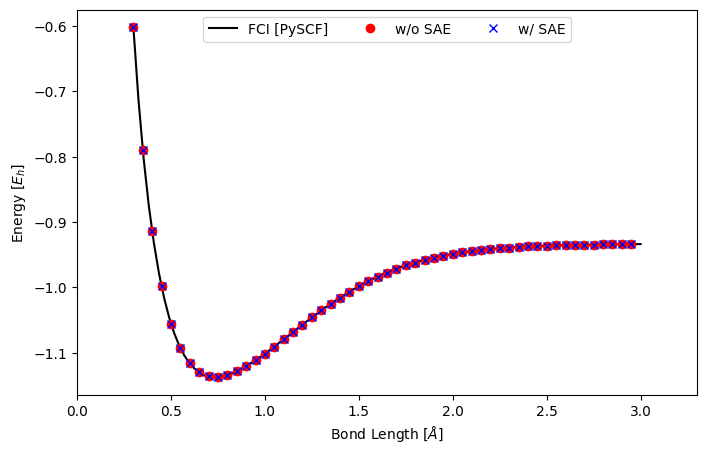

In [39]:
fig, ax = plt.subplots(figsize = (8,5))

ax.plot(fci_bond_lengths, fci_energies, '-k', label = "FCI [PySCF]")
ax.plot(bond_lengths, unsimp_energies, "or", label = "w/o SAE")
ax.plot(bond_lengths, simp_energies, "xb", label = "w/ SAE")


ax.set_xlim(0,3.3)
ax.legend(loc = "upper center", ncols = 3)
ax.set_xlabel("Bond Length [$\AA$]")
ax.set_ylabel("Energy [$E_h$]")